# Network Notes

In [19]:
# good 160 unit *3 network
network_model = "c2-3200-v4-1-3"
iter1 = 420
iter2 = 1200
codec = 3200
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 457 
Training Iteration 458 
Training Iteration 459 
Training Iteration 460 
Generating samples 
saving generated sample output to:  out/c2-3200-v4-1-3/out-c2cb-460 
generating sample data of length:  200 
seed sequence for generation starts at frame index:  0  (approx.  0 : 0 ) 
wrote frames:  200 
Training Iteration 461 
Training Iteration 462 
Training Iteration 463 

42800/60564 [====================>.........] - ETA: 277s - loss: 2.2287'


In [20]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


learn_next_step :  True
seq_step :  80
fit_batch_size :  200
start_iteration :  410
gen_every_nth :  20
frame_prop_loss_scale :  [1, 128, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
framelen :  13
frame_seq_len :  100
num_iterations :  1200
seed_seq_len :  100
save_model_every_nth :  10
test_data_fn :  test/criticalpracticalreason.c2-3200
limit_frames :  0
stateful :  False
shuffle :  False


In [21]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [22]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  True
320 units
tanh activation
0.0 dropout
stateful False

lstm_2 : LSTM
trainable?  True
320 units
tanh activation
0.0 dropout
stateful False

lstm_3 : LSTM
trainable?  True
320 units
tanh activation
0.0 dropout
stateful False

dense_1 : Dense
trainable?  True
13 units
elu activation
 dropout
stateful 



Early Iterations
===

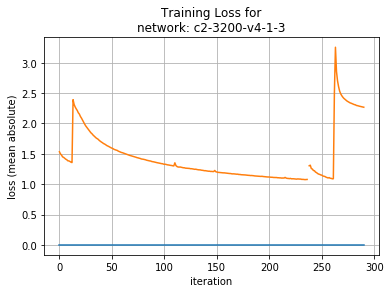

In [23]:
nd.plot_training_loss(network_model)

3200 rate codec



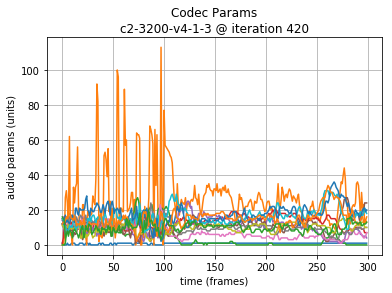

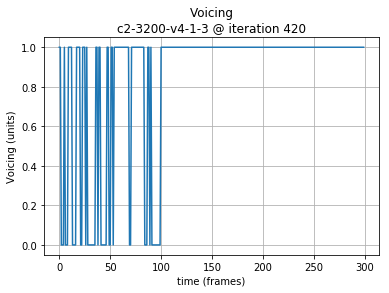

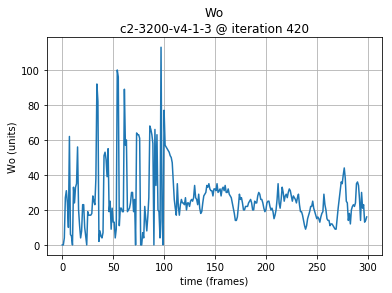

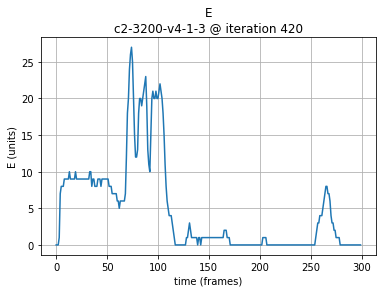

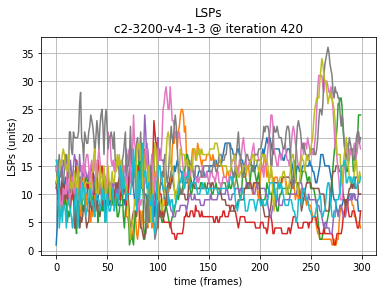

In [24]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

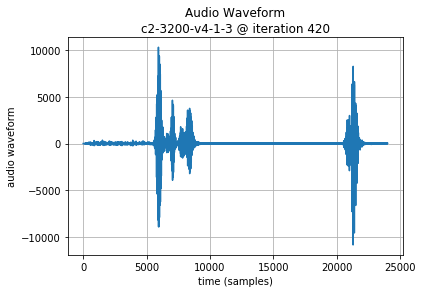

In [25]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [26]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

In [27]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/c2-3200-v4-1-3/out-c2cb-1200'

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))